# Count number of Object using Python-OpenCV


In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Read and convert the image to grayscale

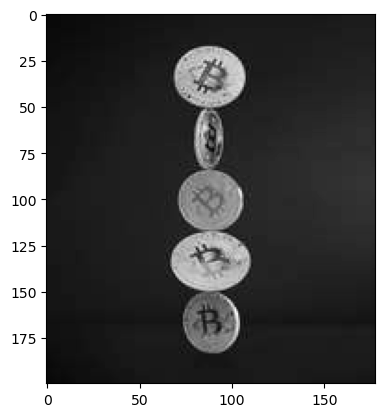

In [61]:
image = cv2.imread('coins.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#### It is necessary to detect the edges of the objects for counting. An image blur is necessary to avoid noise. Here, the Gaussian blur will be applied.

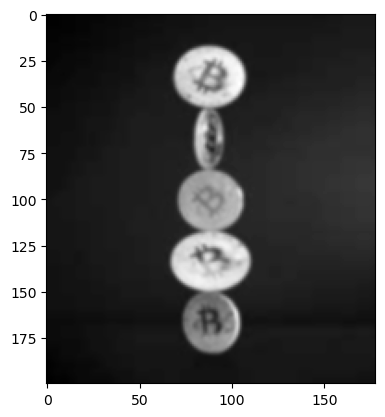

In [62]:
blur = cv2.GaussianBlur(gray, (11, 11), 1)
plt.imshow(blur, cmap='gray')

#### Next, a canny algorithm is applied to help detect the edges. A value between 30 & 150 are consider as an edge for this image.

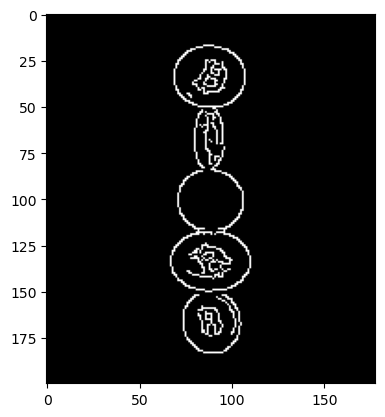

In [63]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

#### The edges are not connected. They need to be connected, made thicker and more visible. 

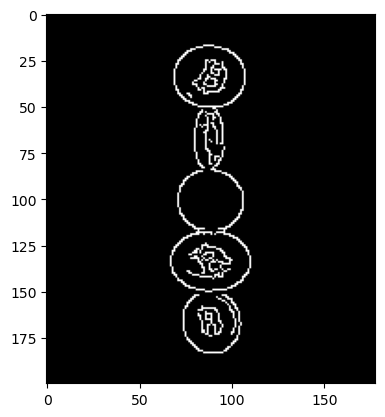

In [64]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

#### Next, the contour in the image is calculated and the colours in the original are converted from BGR to RGB to overlay the contours.

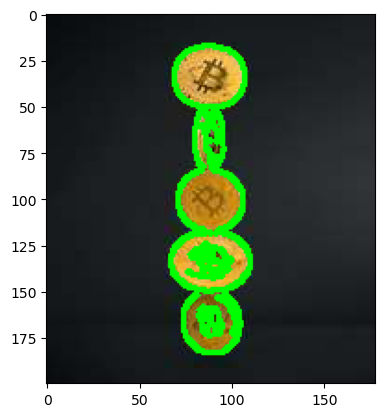

In [65]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)

In [66]:
print("Coins in the image : ", len(cnt))

Coins in the image :  9


There seems to be problems with the tutorial code. A future project may be to actually implement an object counting algorithm.

Moreover, it can be noted that the edges on the sides of a coin could easily mislead the method used above.